# MNIST the fruit fly of machine learning

## Intro  
MNIST is arguably one of the most studied dataset in machine learning. In this notebook, we are going to do a quick exploration of the dataset and in later notebooks we are going to try different neural network models on it.  

The dataset can be find at Kaggle's website [here](https://www.kaggle.com/c/digit-recognizer).   

The reasons I choose to use this dataset are: 
    1. Get you to know about kaggle, it is a great community for practicing and discussing machine learning methods  
    2. You can try to make predictions on the test set and submit your result at Kaggle to see how well your model works  

Note, i am using python 2.7.   
If you got questions concate me @ ryanzjlib@gmail.com

In [1]:
from __future__ import print_function
from __future__ import division

import pandas as pd

import numpy as np

from IPython.display import display

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

## Dataset  
MNIST is a dataset of hand written digits. Each row in the dataset represents a single hand written digits (0,1,...,9), so it is a multiclass classification problem.   

Let's load the data and make a couple of plots of the digits to help you understand it better.

In [2]:
train = pd.read_csv("data/train.csv")

display(train.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The label column is the target variable. And the rest columns represents the ink intensity in each pixel. The hand written digits are of size $28 \times 28$, so there are 784 pixel values for each digit.    

Let's display a couple of them

label is 1


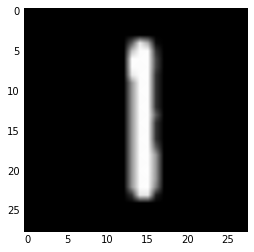

label is 1


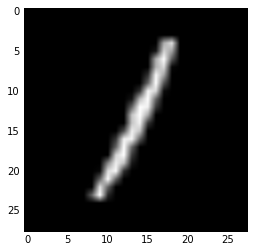

label is 6


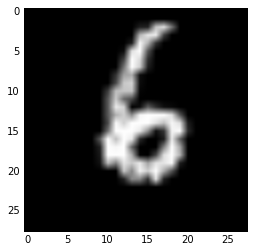

label is 3


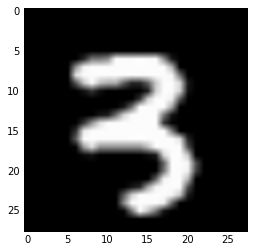

label is 5


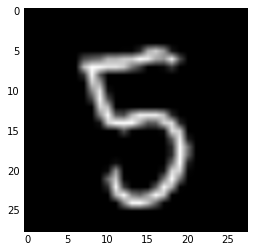

label is 6


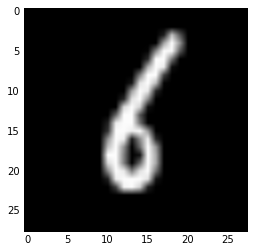

label is 2


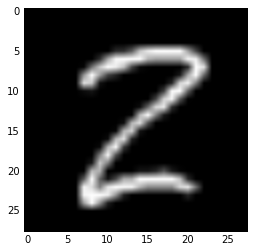

label is 1


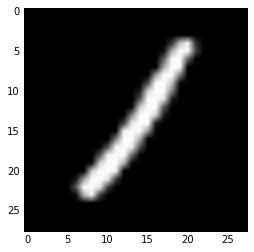

label is 6


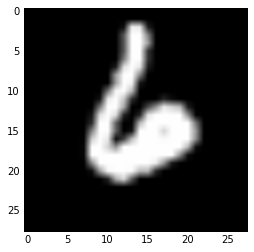

label is 0


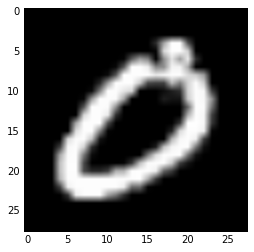

In [3]:
np.random.seed(36)
for i in np.random.randint(low = 0, high = train.shape[0] - 1, size = 10):
    print('label is %s' % train.iloc[i,0])
    image = train.iloc[i,1:].values.reshape(28,28)
    plt.imshow(image, cmap = 'gray')
    plt.show()
    plt.close()

We human can distinguish different digits pretty well. But for computers it used to be hard, because back then most softwares were hand written.   

Just imagin you have to design some rule based program to tell different digits apart. What would you extract from your images? What rules would you hard code? How complicated your rules can be? And how accuracy you think that would be?   

Now, we will fit a simple statistical model i.e. Logistic Regression instead of hand design rules. It will serve as a benchmark for later comparisions when we dive deeper into neural networks. 

In [8]:
X = train.iloc[:, 1:].values/255   # to normalize 
y = train['label'].values
LogReg = LogisticRegression(max_iter = 20, random_state = 1412, solver = 'sag', multi_class = 'multinomial')  
# I suggest you to try different max_iter number and solver for yourself
LogReg.fit(X = X, y = y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

Let's see what the benchmark accuracy score is?

In [9]:
print(accuracy_score(y_true = y, y_pred = LogReg.predict(X)))

0.939523809524


## Closing  

So now, you have a pretty good understanding of the dataset and how simple statistical model perform on this problem.   

My next notebook is still not going to be deep learning, but a intro to the popular deep learning library *tensorflow*, and I will show you how you can build a logistic regression model in tensorflow.  